In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import *

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv")

In [3]:
df.shape

(2919, 80)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [5]:
del df["Id"]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 no

In [7]:
df = df[~df.SalesPrice.isnull()]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

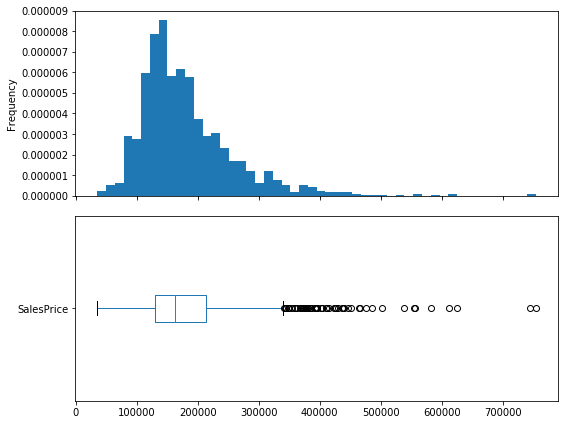

In [34]:
plt.figure(figsize = (8, 6))
plt.subplot(2, 1, 1)
df.SalesPrice.plot.hist(bins = 50, density = True, sharex = True)
plt.subplot(2, 1, 2)
df.SalesPrice.plot.box(vert = False, sharex = True)
plt.tight_layout()

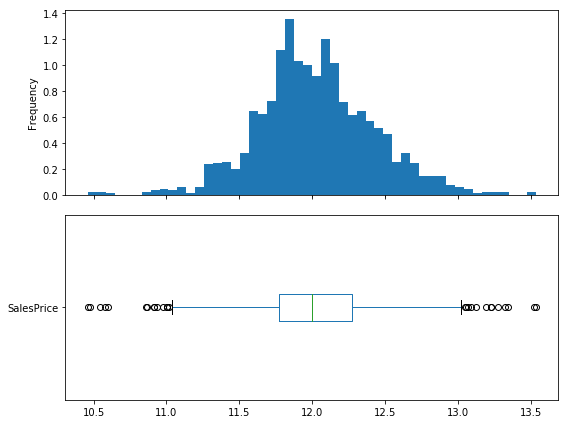

In [33]:
plt.figure(figsize = (8, 6))
plt.subplot(2, 1, 1)
np.log(df.SalesPrice).plot.hist(bins = 50, density = True, sharex = True)
plt.subplot(2, 1, 2)
np.log(df.SalesPrice).plot.box(vert = False, sharex = True)
plt.tight_layout()

In [76]:
target = "SalesPrice"
X = df.copy()
del X[target]
y = np.log(df[target])

# Convert the categorical features into one hot encoded values 
X_dummy = pd.get_dummies(X, drop_first=True)

# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X_dummy, y
        , test_size = 0.3, random_state = 1)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("pca", decomposition.PCA(n_components=50)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Measure performance
print("training r2: %f, \ntest r2: %f, \ntraining rmse: %f \ntesting rmse: %f" % (
    metrics.r2_score(y_train, y_train_pred),
    metrics.r2_score(y_test, y_test_pred),
    np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),
    np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
)) 

training r2: 0.871591, 
test r2: 0.871621, 
training rmse: 0.137179 
testing rmse: 0.155763


In [59]:
%%time 

target = "SalesPrice"
X = df.copy()
del X[target]
y = np.log(df[target])

# Convert the categorical features into one hot encoded values 
X_dummy = pd.get_dummies(X, drop_first=True)

# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X_dummy, y
        , test_size = 0.3, random_state = 1)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=2
    #                        , include_bias=False)),
    #("pca", decomposition.PCA(n_components=80)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(alpha=1.0, penalty="l2", tol=1e-6,
                        , learning_rate="invscaling"
                        , eta0 = 1e-3
                        , l1_ratio=0.1
                        , max_iter=1000, random_state=1))
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Measure performance
print("""training r2: %f, \ntest r2: %f, 
   \ntraining rmse: %f \ntesting rmse: %f""" % (
    metrics.r2_score(y_train, y_train_pred),
    metrics.r2_score(y_test, y_test_pred),
    np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),
    np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
)) 

training r2: 0.897375, 
test r2: 0.859468, 
   
training rmse: 0.122635 
testing rmse: 0.162969
CPU times: user 983 ms, sys: 10.9 ms, total: 994 ms
Wall time: 807 ms


In [61]:
0.9 ** 10

0.3486784401000001

Different ways to improve the model?

1. Polynomial features - it goes beyond linear relationship between feature and target
2. Regularization - made the model to stable, consistent
3. Log on target (long right tail) - minimize the impact of the outliers
4. Feature generation
5. Choose the right set of hyper parameters
6. Find the significant features

In [64]:
from sklearn import feature_selection

In [66]:
_, pvals = feature_selection.f_regression(X_train, y_train)

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# Feature selection using significance test

In [77]:
significance = (
    pd.DataFrame({"feature" : X_dummy.columns, "pval": pvals})
    .query("pval < 0.005")
    .sort_values("pval")
)

In [78]:
significance

,feature,pval
3,OverallQual,1.543610e-232
15,GrLivArea,1.502663e-147
25,GarageCars,8.980028e-140
26,GarageArea,9.673012e-121
18,FullBath,7.435435e-106
11,TotalBsmtSF,4.707153e-98
151,ExterQual_TA,1.996594e-96
12,1stFlrSF,1.957045e-95
5,YearBuilt,2.946855e-85
6,YearRemodAdd,3.840149e-80


In [82]:
top10features = list(significance.feature)[:10]
top10features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'FullBath',
 'TotalBsmtSF',
 'ExterQual_TA',
 '1stFlrSF',
 'YearBuilt',
 'YearRemodAdd']

In [86]:
%%time 

target = "SalesPrice"
X = df.copy()
del X[target]
y = np.log(df[target])

# Convert the categorical features into one hot encoded values 
X_dummy = pd.get_dummies(X, drop_first=True)[top10features]

# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X_dummy, y
        , test_size = 0.3, random_state = 1)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=2
    #                        , include_bias=False)),
    #("pca", decomposition.PCA(n_components=80)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Measure performance
print("""training r2: %f, \ntest r2: %f, 
   \ntraining rmse: %f \ntesting rmse: %f""" % (
    metrics.r2_score(y_train, y_train_pred),
    metrics.r2_score(y_test, y_test_pred),
    np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),
    np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
)) 

training r2: 0.803295, 
test r2: 0.844816, 
   
training rmse: 0.169784 
testing rmse: 0.171254
CPU times: user 90 ms, sys: 4.45 ms, total: 94.5 ms
Wall time: 91 ms


In [ ]:
# feature selection based on the parameter magnitude

# Identify the principle component

In [72]:
X_dummy.shape

(1460, 258)